# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




<>:55: SyntaxWarning: invalid escape sequence '\$'
<>:55: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_105682/1842324635.py:55: SyntaxWarning: invalid escape sequence '\$'
  data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


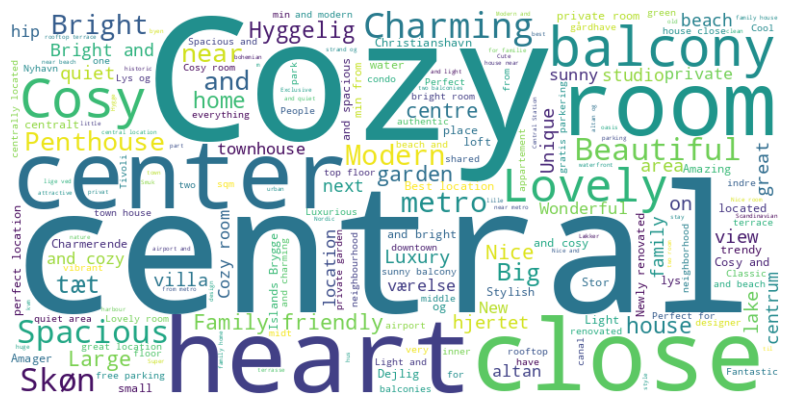

In [1]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

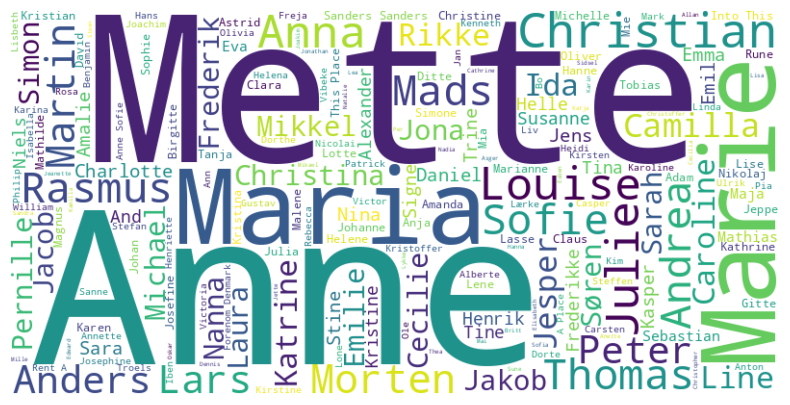

In [2]:
# TODO: Remove any names of non persons!!!
stop_words = ['og', '&', ' ', 'Og', 'OG', 'ApartmentinCopenhagen']

texts = ' '.join(data_filtered['host_name'].astype(str))

wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400, prefer_horizontal=0.7).generate(texts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [3]:
data_filtered["host_name"].value_counts().head(10)

host_name
ApartmentinCopenhagen    134
Mette                    131
Christian                116
Julie                    107
Maria                    104
Anna                      96
Anne                      96
Mads                      94
Louise                    92
Rasmus                    92
Name: count, dtype: int64

#### Observation

By comparing the name distribution from Danmarks Statistik with our WordCloud, we can see a clear similarity. In the TOP 10 most used (person) host names from our WordCloud, all except Maria are also found in the official statistics.

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

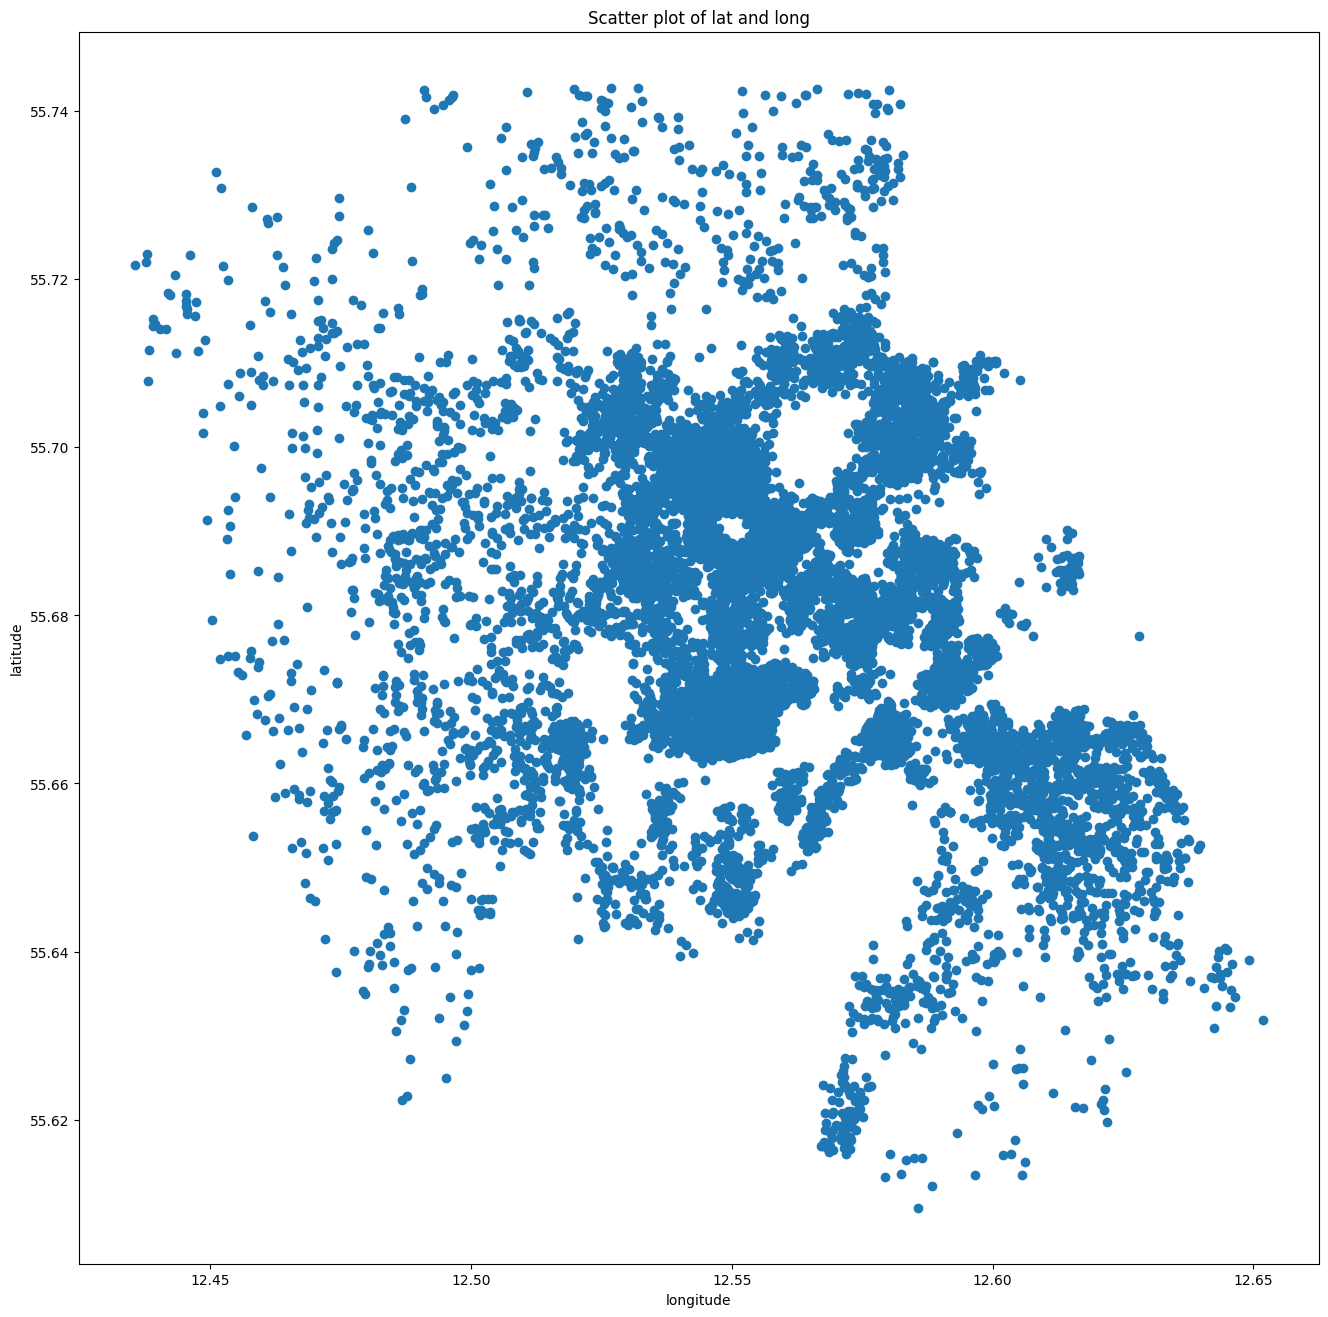

In [4]:
import matplotlib.pyplot as plt

latitude = data_filtered['latitude']
longitude = data_filtered['longitude']

plt.figure(figsize=(16, 16))
plt.scatter(longitude, latitude)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Scatter plot of lat and long')

plt.show()

In [5]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattermap(
        lat=data_filtered.latitude,
        lon=data_filtered.longitude,
    ))

fig.update_layout(
    hovermode='closest',
    map=dict(
        center=dict(
            lat=55.68,
            lon=12.56
        ),
        zoom=11
    ),
    width=1200,
    height=800
)
fig.show()

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

In this section, we will explore the relationship between features of AirBnB listings in Copenhagen and the neighborhoods they are located in using boxplots.

Objective:
- To understand how the price of AirBnB listings varies across different neighborhoods in Copenhagen.
- To see yearly availability of AirBnB listings across different neighborhoods in Copenhagen.

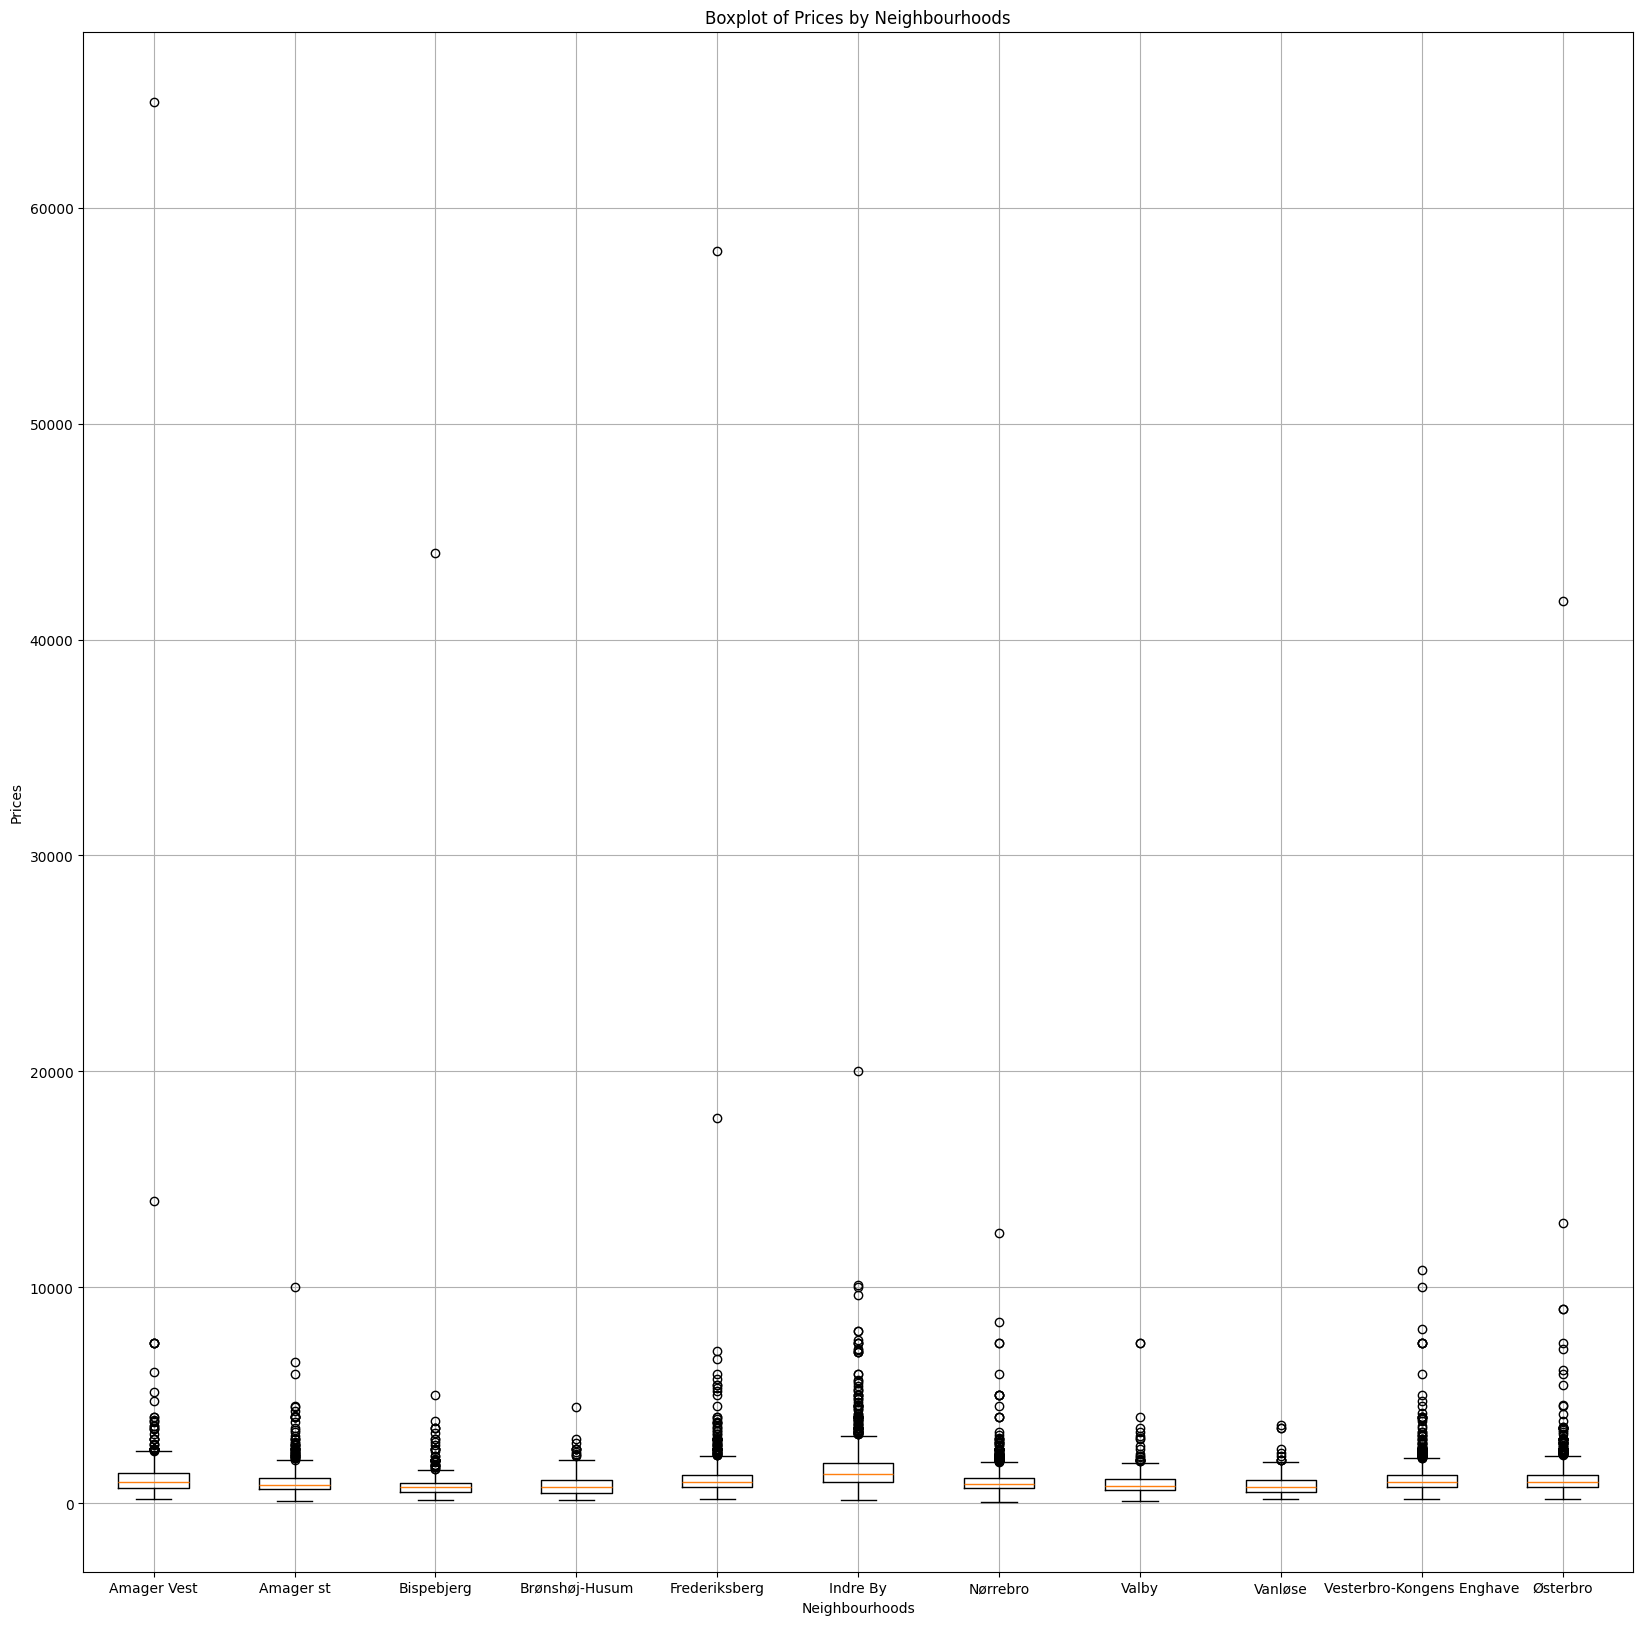

In [6]:
import matplotlib.pyplot as plt

neighbourhoods = sorted(neighbourhoods)

# Create a boxplot
plt.figure(figsize=(20, 20))
plt.boxplot([data_filtered[data_filtered['neighbourhood_cleansed'] == neighbourhood]['price'] for neighbourhood in neighbourhoods], tick_labels=neighbourhoods)

plt.xlabel('Neighbourhoods')
plt.ylabel('Prices')
plt.title('Boxplot of Prices by Neighbourhoods')
plt.grid()
plt.show()

#### Observation

We can see that the neighbourhoods have roughly normal distribution of data with a number of outliers within each of them. Since the prices follow a normal distribution, the majority of the listings are priced near the average or median price for that neighborhood. Notably neighborhoods like Østerbro, Frederiksberg show a higher density of outliers, suggesting these areas have more premium proprietes, but not the extreme luxury of the market.

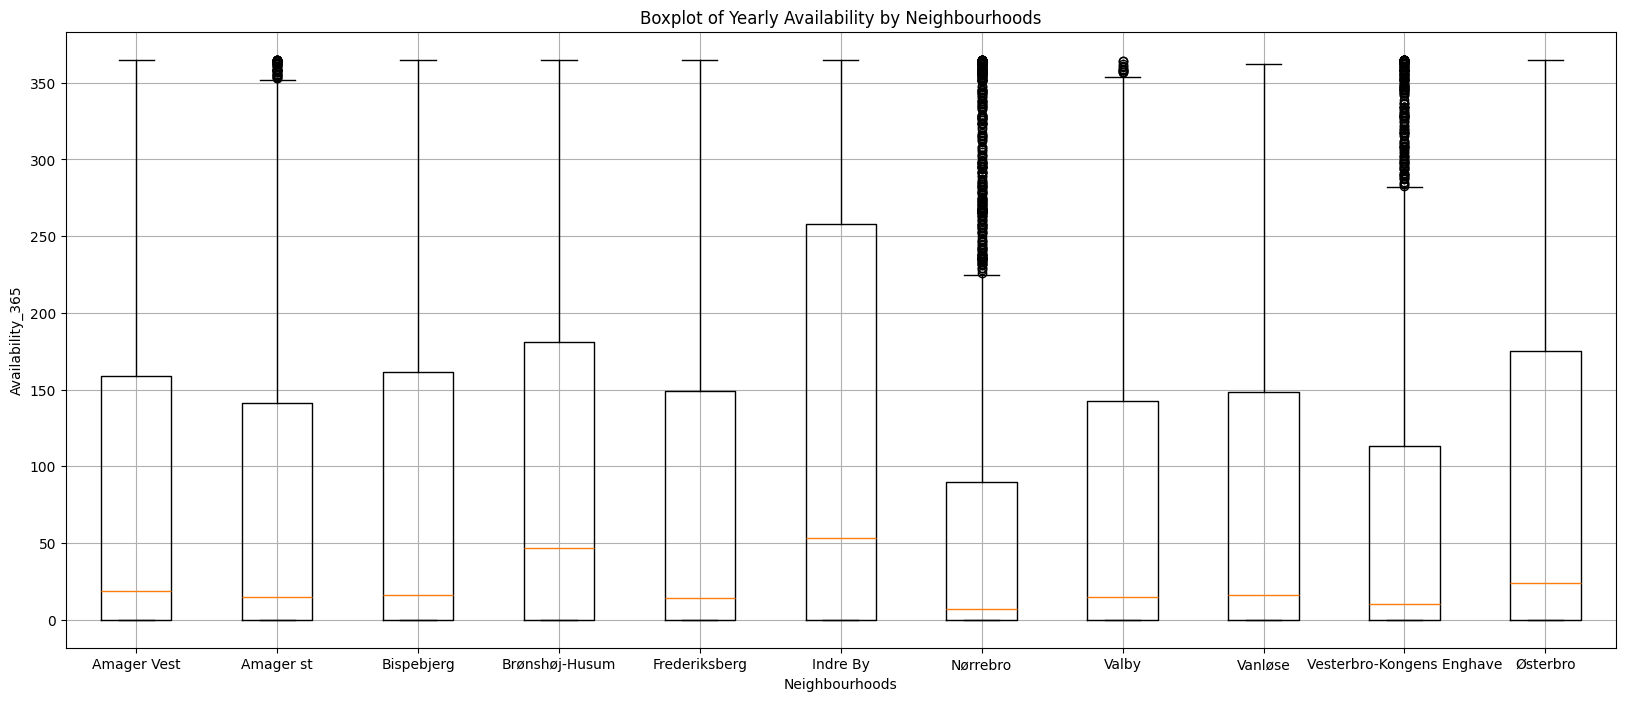

In [7]:
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(20, 8))
plt.boxplot([data_filtered[data_filtered['neighbourhood_cleansed'] == neighbourhood]['availability_365'] for neighbourhood in neighbourhoods], tick_labels=neighbourhoods)

plt.xlabel('Neighbourhoods')
plt.ylabel('Availability_365')
plt.title('Boxplot of Yearly Availability by Neighbourhoods')
plt.grid()
plt.show()

#### Observation

We can see that all of the neighbourhoods have positive skew, meaning that the distribution has more data points on the lower end, with only a few values pulling in up.

The availability all year round varies significantly across Copenhagen's neighborhoods, the presence of numerous outliers (dots) at the top of most neighborhoods indicates there are some properties that are available almost year-round in every area, though their proportion varies by neighborhood.

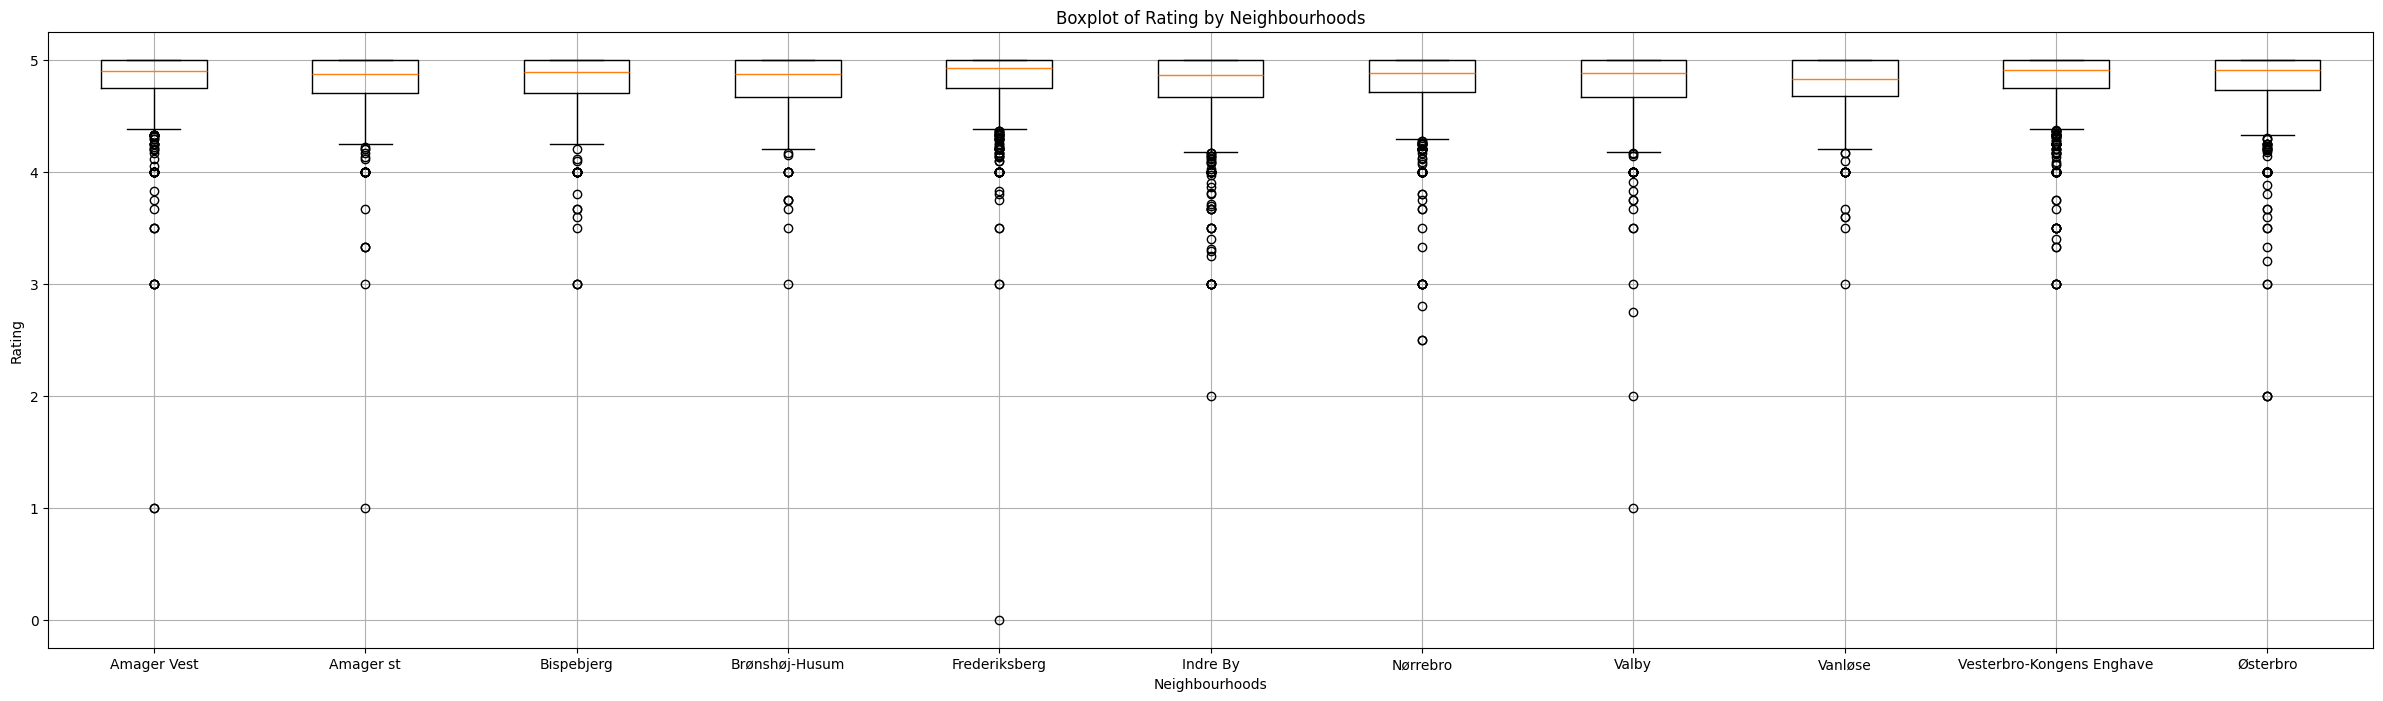

In [8]:
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(30, 8))
plt.boxplot([data_filtered[data_filtered['neighbourhood_cleansed'] == neighbourhood]['review_scores_rating'] for neighbourhood in neighbourhoods], tick_labels=neighbourhoods)

plt.xlabel('Neighbourhoods')
plt.ylabel('Rating')
plt.title('Boxplot of Rating by Neighbourhoods')
plt.grid()
plt.show()


#### Observation

We can see the scores across all neighborhoods are generally high, with median ratings consistently around 4.5-5.0. However, there are some notable outliers in every neighborhood, particularly on the lower end. The distribution of ratings shows that while most properties maintain high standards, there are occasional listings that significantly underperform.


### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [9]:
# AirBnB Neighborhoods Analysis (room type + price)

# df4 - datafiltered for 4th exercise
df4 = data_filtered.groupby(['neighbourhood_cleansed', 'room_type'])

## Mean price in Neighbourhoods

The mean price varies based on the room type and the neighbourhood. As we can see on the plot below, the mean price is usually on the same level for the room types across the neighbourhoods except for Amager St which has extremely high mean price for the shared room.

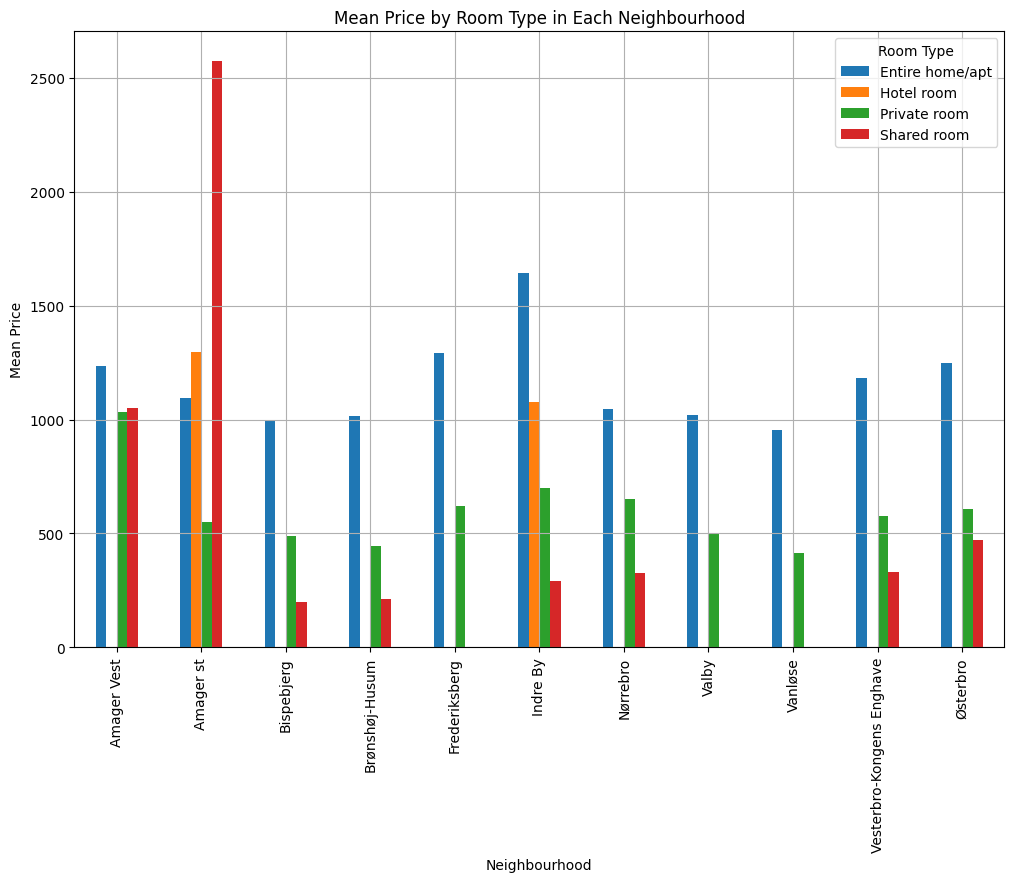

In [10]:
mean_data = df4['price'].mean().unstack()
mean_data.plot.bar(figsize=(12,8))

plt.xlabel("Neighbourhood")
plt.ylabel("Mean Price")
plt.title("Mean Price by Room Type in Each Neighbourhood")
plt.legend(title="Room Type")
plt.grid()

# Show the plot
plt.show()


## Standard deviation/variance


<Axes: xlabel='neighbourhood_cleansed'>

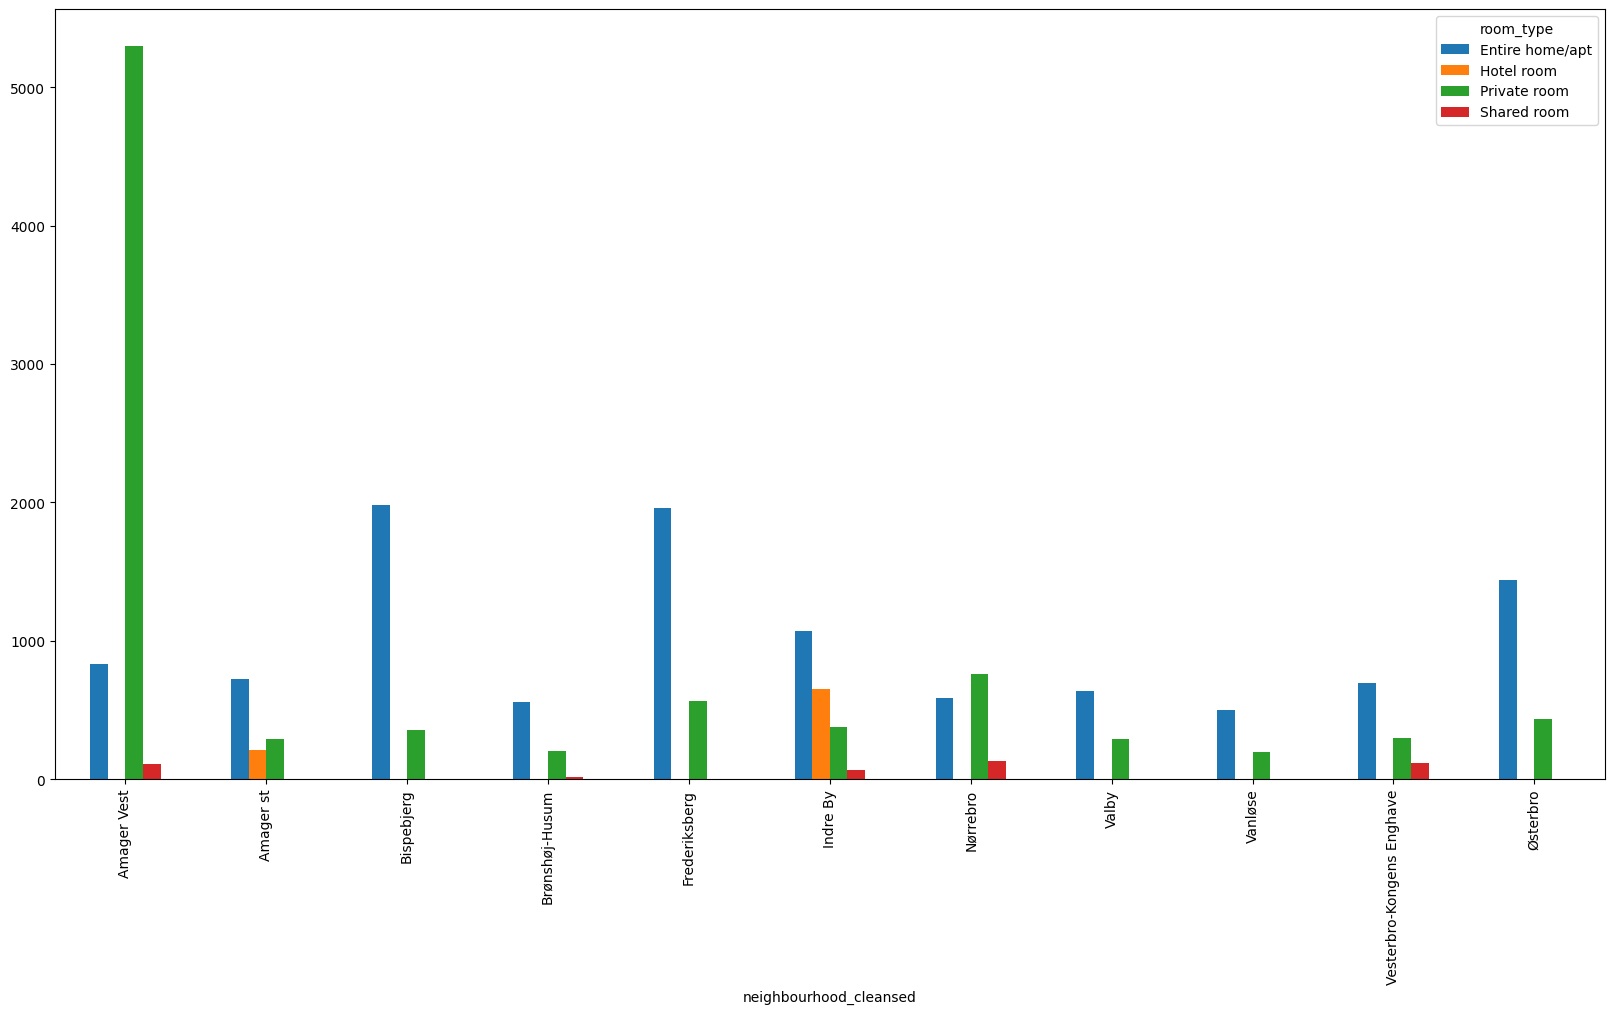

In [11]:
df4.price.std().unstack().plot(kind='bar', figsize=(20, 10))

## Minimum price per Room type

<Axes: xlabel='neighbourhood_cleansed'>

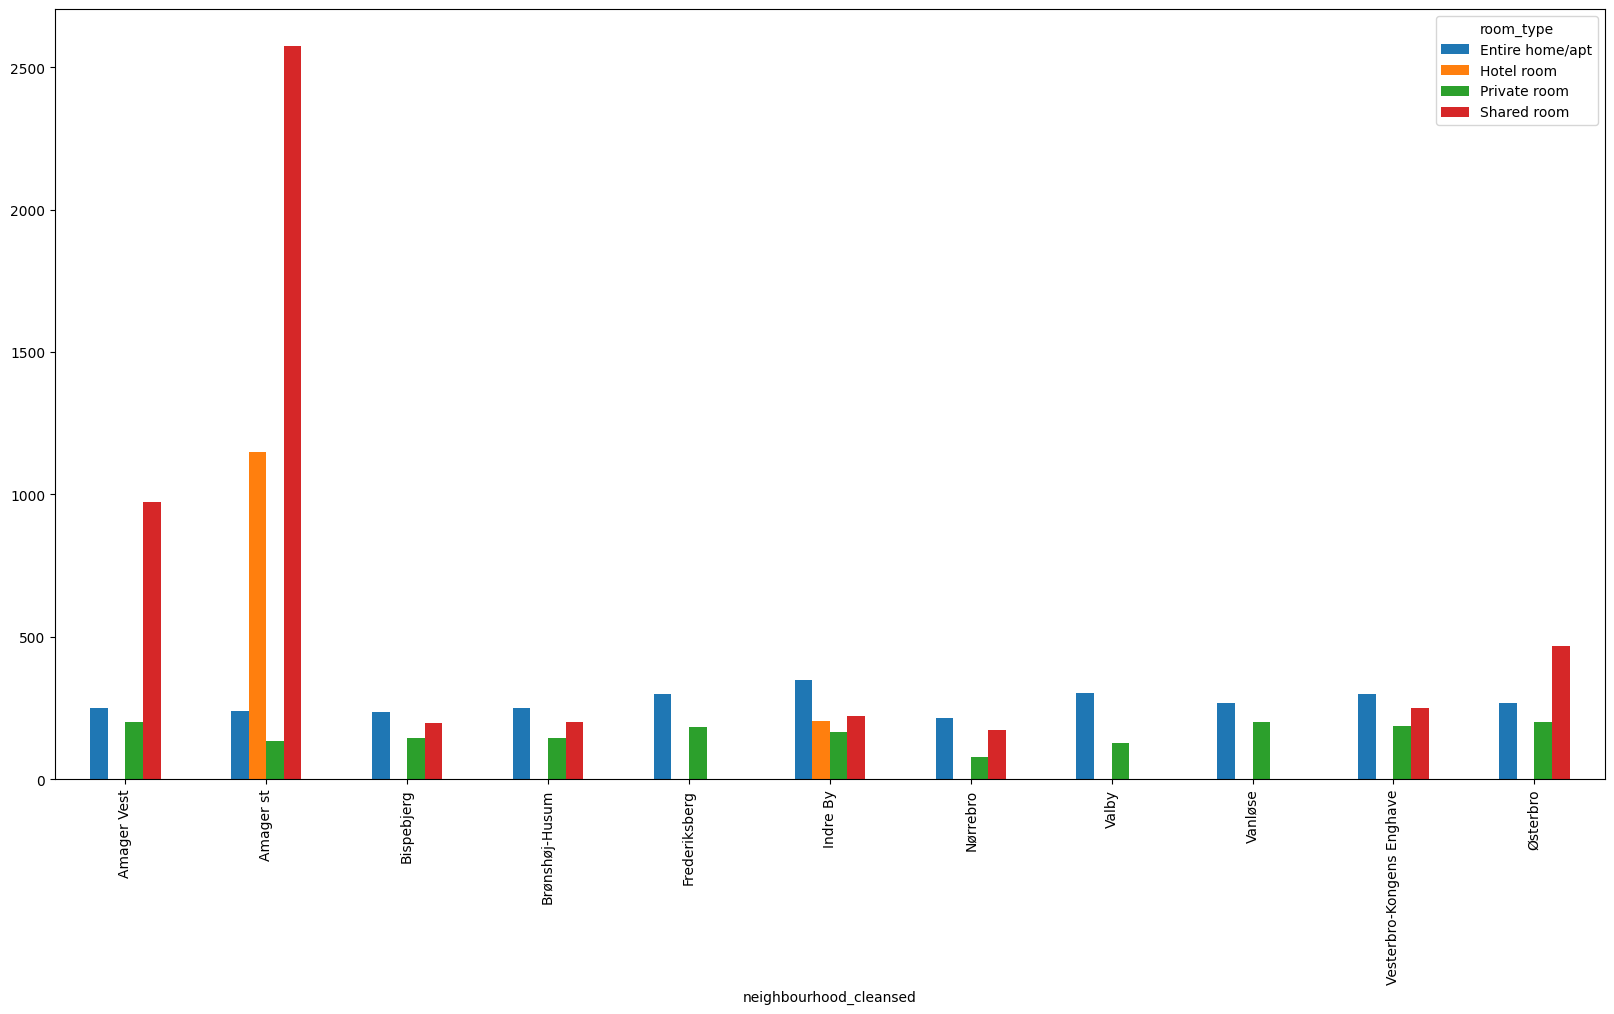

In [12]:
df4.price.min().unstack().plot(kind='bar', figsize=(20, 10))

## Max price per Room typepe

<Axes: xlabel='neighbourhood_cleansed'>

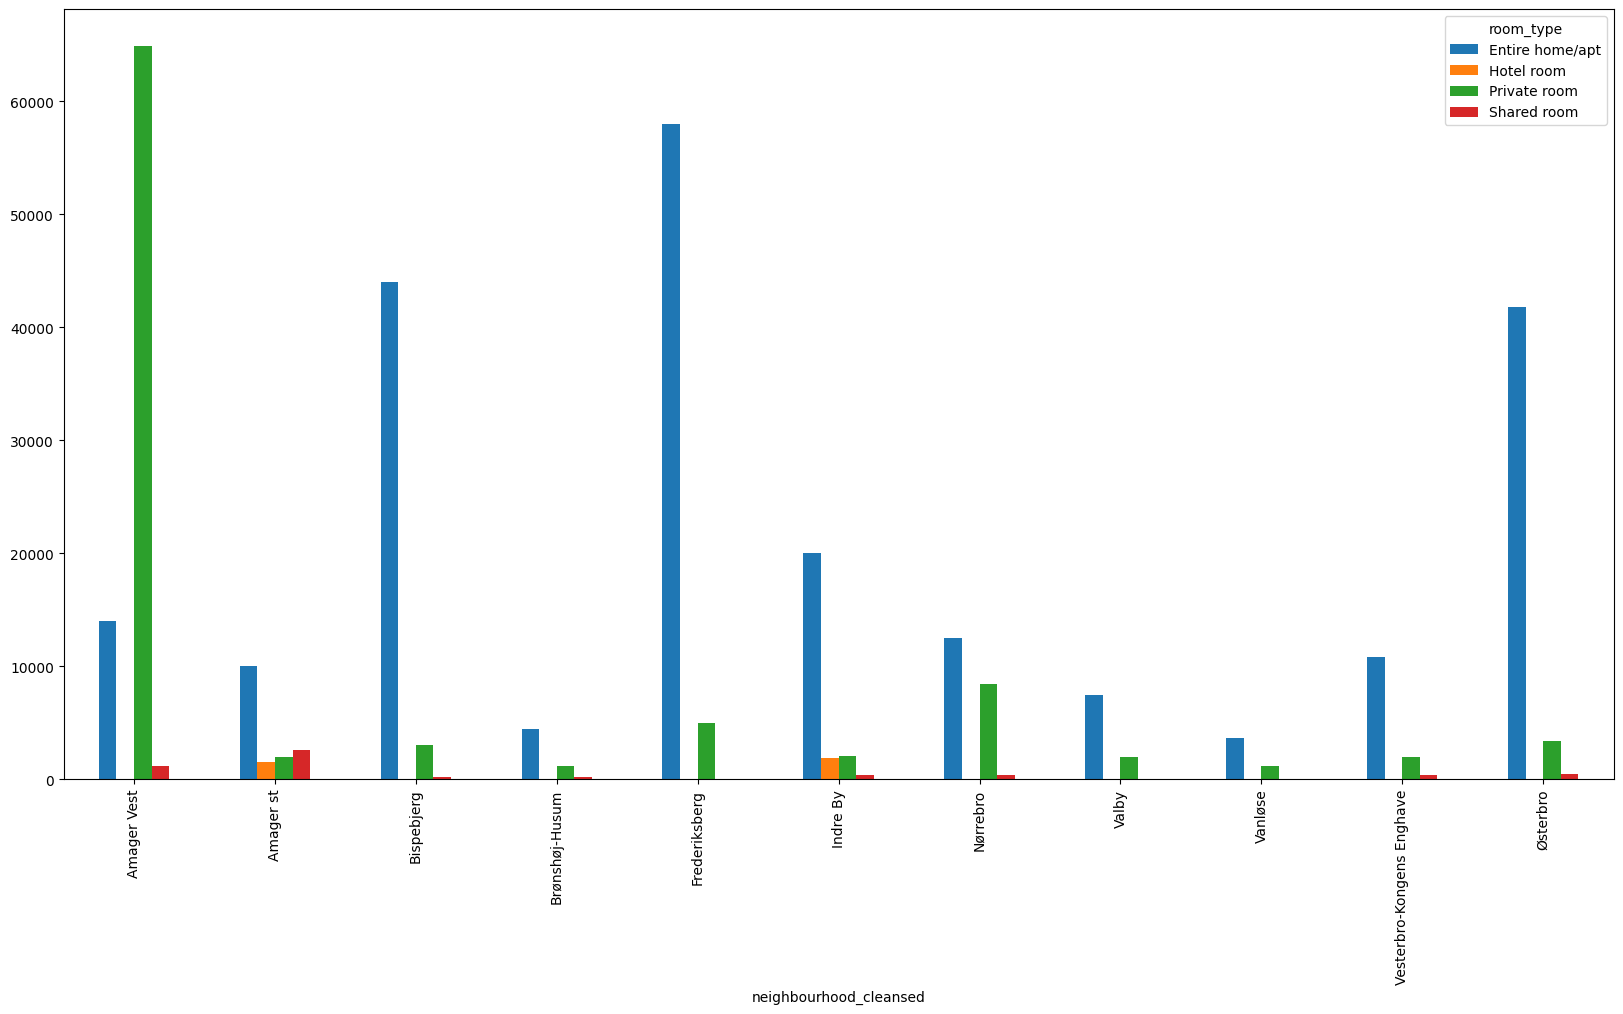

In [13]:
df4.price.max().unstack().plot(kind='bar', figsize=(20, 10))

## Quartiles
A quantile is a part of Quartiles

<Axes: xlabel='neighbourhood_cleansed,room_type'>

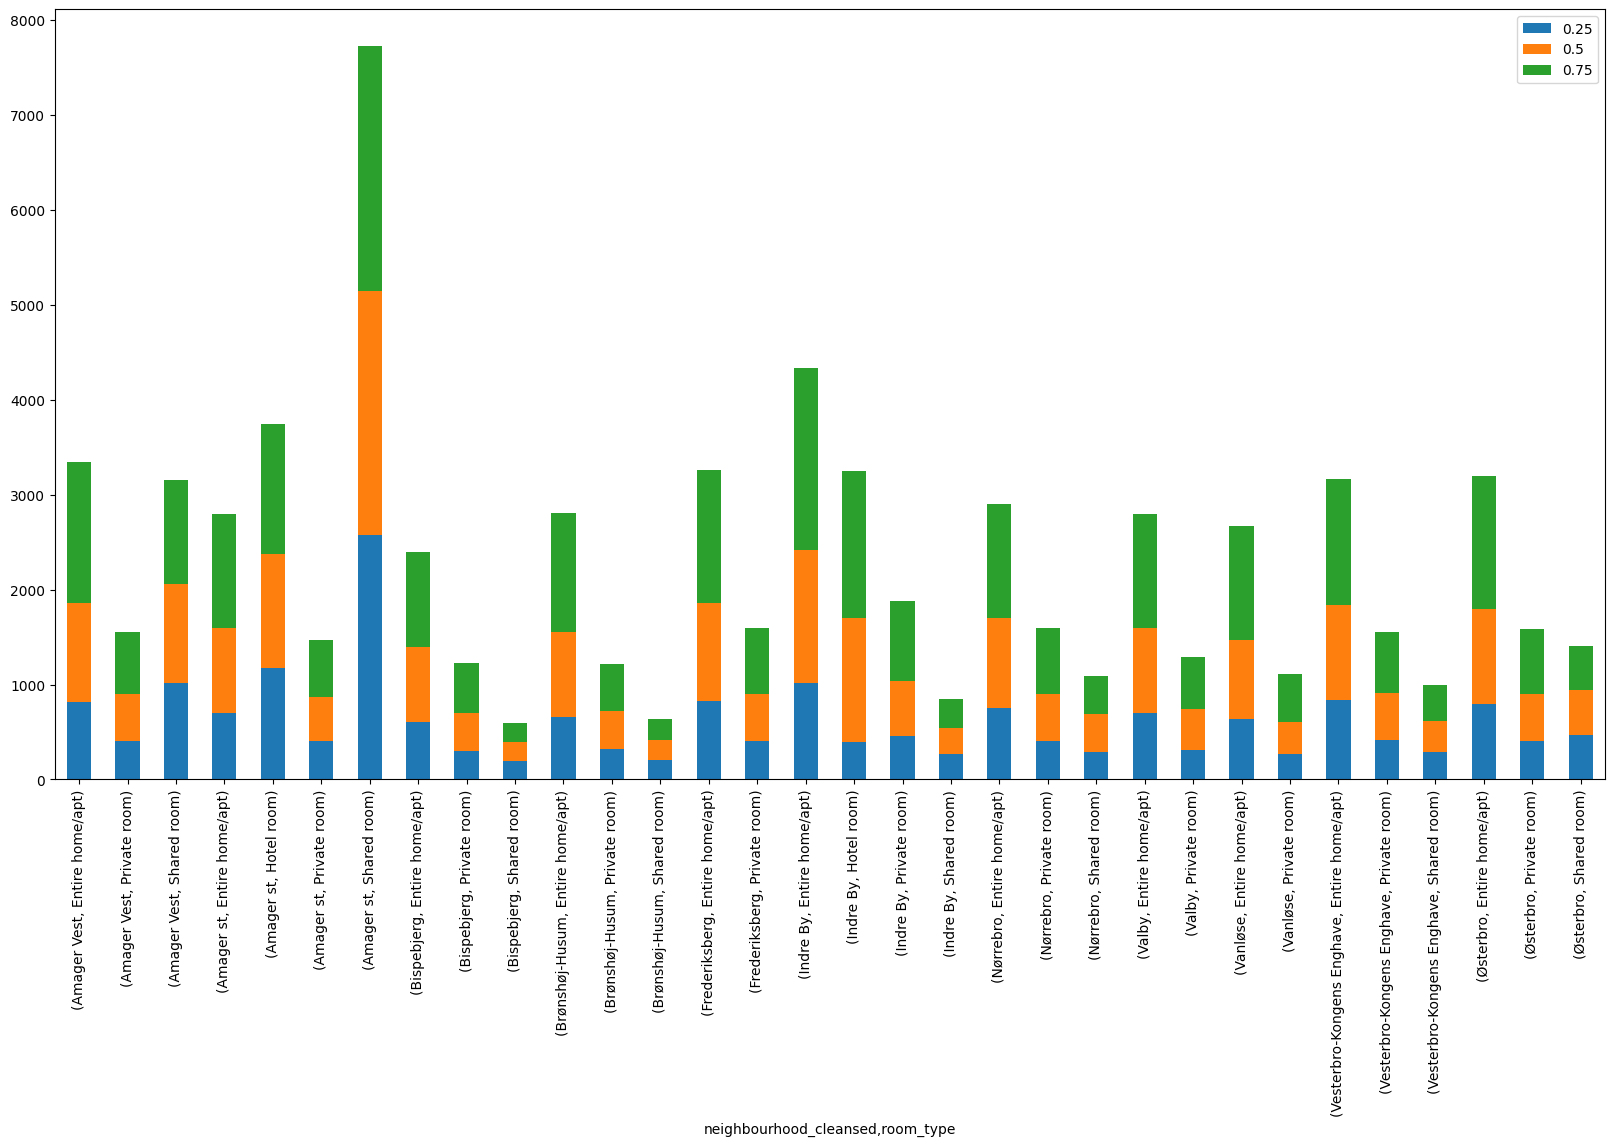

In [14]:
df4.price.quantile([0.25, 0.5, 0.75]).unstack().plot(kind='bar', stacked=True, figsize=(20, 10))

### 5. Based on self-chosen features, and with "price_category" as your target, develop a k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [ ]:
# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
scaler = StandardScaler()

data_filtered["room_type_encoded"] = label_encoder.fit_transform(data_filtered["room_type"])
data_filtered["neighbourhood_cleansed_encoded"] = label_encoder.fit_transform(data_filtered["neighbourhood_cleansed"])

features = ["room_type_encoded", "neighbourhood_cleansed_encoded", "availability_365", "number_of_reviews", "review_scores_rating", "latitude", "longitude"]
target = "price_category"

X = data_filtered[features]
y = data_filtered[target]

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: How does scale work?
# Scale train and test data separately to not leak any data
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

In [16]:
# Model Training
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neighbors_range = range(3, 50) 
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

best_accuracy = 0
best_params = {'n_neighbors': None, 'metric': None}

for n_neighbors in neighbors_range:
    for metric in distance_metrics:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)

        knn.fit(X_train, y_train)

        predictions = knn.predict(X_test)

        accuracy = accuracy_score(y_test, predictions)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['n_neighbors'] = n_neighbors
            best_params['metric'] = metric

print(f"Best parameters: Number of Neighbors - {best_params['n_neighbors']}, Distance Metric - {best_params['metric']}")
print(f"Highest Accuracy: {best_accuracy*100:.2f}%")

Best parameters: Number of Neighbors - 47, Distance Metric - euclidean
Highest Accuracy: 70.12%
